<a href="https://colab.research.google.com/github/Kaushal-Top5699/TF_CNN_Binary_Classification/blob/main/TF_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Dataset used is from Food-101, we have modified to use only two classes pizza and steak.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-10-30 05:36:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.5MB/s    in 3.2s    

2023-10-30 05:36:45 (32.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


Viualising images, we need to get class names programatically.

In [ ]:
# Get class names programmatically.
import pathlib
import matplotlib.image as mpimg
import random
import os

In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# class_names = class_names[1:] if you have .DS_store file
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize our images.
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it.
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {image.shape}")
  return image

['1137400.jpg']
Image Shape: (512, 512, 3)


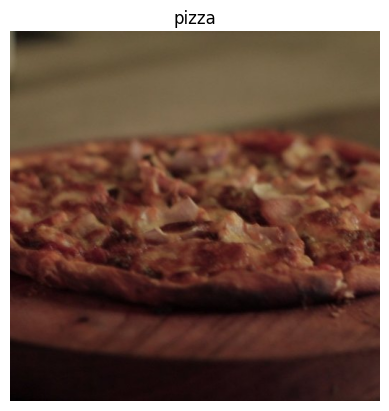

In [ ]:
# View a random image from training
pizza_image = view_random_image("pizza_steak/train/", "pizza")

['2966859.jpg']
Image Shape: (512, 512, 3)


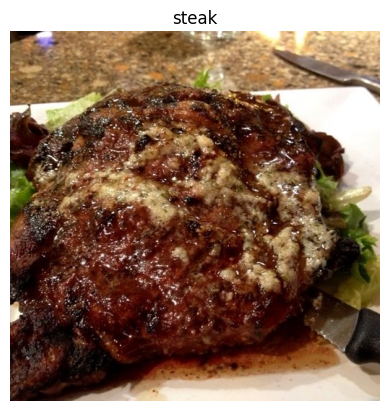

In [ ]:
# View a random image from training
steak_image = view_random_image("pizza_steak/train/", "steak")

In [ ]:
tf.constant(pizza_image)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[105, 103,  82],
        [ 98,  96,  75],
        [ 94,  91,  74],
        ...,
        [109,  94,  63],
        [109,  94,  63],
        [108,  93,  62]],

       [[106, 104,  83],
        [ 99,  97,  76],
        [ 95,  92,  73],
        ...,
        [109,  94,  63],
        [109,  94,  63],
        [109,  94,  63]],

       [[109, 104,  84],
        [103,  98,  78],
        [ 96,  93,  74],
        ...,
        [109,  94,  63],
        [109,  94,  63],
        [109,  94,  63]],

       ...,

       [[  4,   2,   3],
        [  4,   2,   3],
        [  4,   2,   3],
        ...,
        [ 55,  31,  27],
        [ 55,  31,  27],
        [ 53,  32,  27]],

       [[  5,   3,   4],
        [  5,   3,   4],
        [  4,   2,   3],
        ...,
        [ 53,  32,  27],
        [ 52,  31,  26],
        [ 51,  32,  26]],

       [[  5,   3,   4],
        [  5,   3,   4],
        [  5,   3,   4],
        ...,
        [ 53,  32,  2

In [ ]:
# Lets check the shape of pizza image.
pizza_image.shape

(512, 512, 3)

## Few things to do first

1. Tensorflow understands number and images.
2. Make sure tensors are of right shape.
3. Scaling of data (Normalise or Standardise) that is, getting all the values in tensors between 0 and 1. We do it by dividing pixel values by 255, because that's the max size of a pixel.

Lets build the Convolutional Neural Network to find patterns in our images.

1. Load our images.
2. Preprocess our images (getting into tensor format).
3. Build our CNN to find patterns in our images.
4. Compile the CNN.
5. Fit the CNN to our training data.

In [ ]:
# Example of getting the values of pizza_image tensor between 0 and 1.
pizza_image_tensor = tf.constant(pizza_image)
pizza_image_tensor/225

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.46666667, 0.45777777, 0.36444443],
        [0.43555555, 0.42666668, 0.33333334],
        [0.41777778, 0.40444446, 0.3288889 ],
        ...,
        [0.48444444, 0.41777778, 0.28      ],
        [0.48444444, 0.41777778, 0.28      ],
        [0.48      , 0.41333333, 0.27555555]],

       [[0.47111112, 0.46222222, 0.36888888],
        [0.44      , 0.4311111 , 0.33777776],
        [0.42222223, 0.40888888, 0.32444444],
        ...,
        [0.48444444, 0.41777778, 0.28      ],
        [0.48444444, 0.41777778, 0.28      ],
        [0.48444444, 0.41777778, 0.28      ]],

       [[0.48444444, 0.46222222, 0.37333333],
        [0.45777777, 0.43555555, 0.34666666],
        [0.42666668, 0.41333333, 0.3288889 ],
        ...,
        [0.48444444, 0.41777778, 0.28      ],
        [0.48444444, 0.41777778, 0.28      ],
        [0.48444444, 0.41777778, 0.28      ]],

       ...,

       [[0.01777778, 0.00888889, 0.01333333],
        [0.01

We need to find a way to do the same for all images in train/pizza and train/steak, before fitting it with the model. Remember to do the same for test dir. Machine Learning models prefer values to be between 0 and 1.

In [ ]:
# ImageDataGenrator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocessing data to get it between 0 and 1.
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories.
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build CNN model (same as tiny VGG on the CNN explainer website).

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2), padding = "valid"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN.
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model.
# The flow from directory will genrate labels for us, therefore, we only pass train_data (genrates X and y for us)
history_1 = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 184ms/step - loss: 0.6726 - accuracy: 0.6140 - val_loss: 0.4855 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4797 - accuracy: 0.7787 - val_loss: 0.3992 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4314 - accuracy: 0.8093 - val_loss: 0.3887 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4185 - accuracy: 0.8180 - val_loss: 0.3805 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.3847 - accuracy: 0.8367 - val_loss: 0.3177 - val_accuracy: 0.8700


We switched the runtime environment to GPU, so that epochs run faster.

In [ ]:
import keras
from matplotlib import pyplot as plt
def plot_curves(history, need_1, need_2):
  plt.plot(history.history[need_1])
  plt.plot(history.history[need_2])
  plt.title(f'Model {need_1}')
  plt.ylabel(f'{need_1}')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

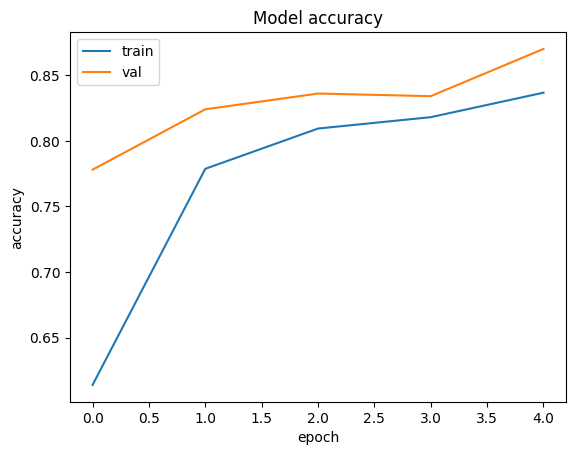

In [ ]:
plot_curves(history_1, "accuracy", "val_accuracy")

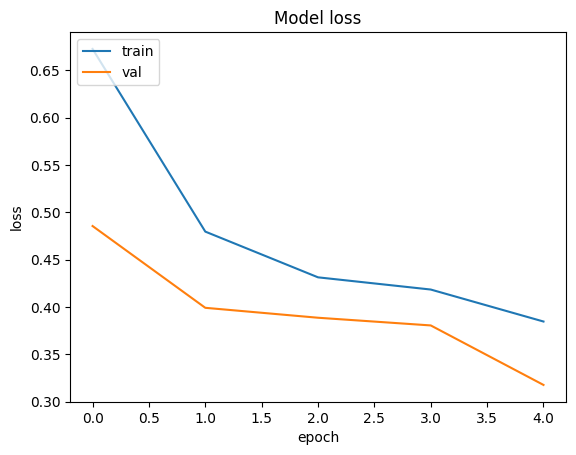

In [ ]:
plot_curves(history_1, "loss", "val_loss")

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## 1. Becoming one with data

['3393547.jpg']
Image Shape: (384, 512, 3)
['1717790.jpg']
Image Shape: (512, 512, 3)


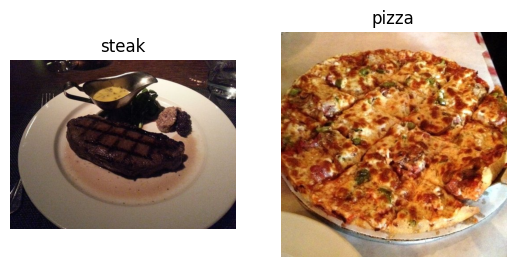

In [ ]:
# Become one with data.
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Preprocessing the data (getting it ready for the model).
# Define directory dataset paths.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

## 2. Next step is to turn our data into batches. We are preprocessing.

nstead of looking at all the 10k images in our dataset, the model could look at only 32 images at a time. Therefore, the default batch_size is always 32.

The reason for this is:

1. 10,000 images or more might not fit into the computer's processor (GPU).
2. Trying to fit in 10,000 images at once might not help our model to learn very well.

**Normalization of data.**

In [ ]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)
# Getting all tensor values between 0 and 1.

Creating batches of data.

In [ ]:
# Load in our images from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample of train data batch.
images, labels = train_data.next() # Gets the next batch of images and labels of train_data
len(images), len(labels)
# Both are lists each containg 32 items.

(32, 32)

In [ ]:
# How many batches of data?
len(train_data)

47

A total of **47** batches **(1500/32)**

In [ ]:
# Get the first batch of labels.
labels

## 3. Creating a model.

Let's start by creating a simple CNN model, without pooling.

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, # Filter is number of sliding windows going across the input.
                           (3, 3), # Size of sliding window.
                           strides = (1, 1), # Size of step the sliding window taks on input.
                           padding = "valid", # If valid it compresses the image, and if same it keeps the input in the original shape.
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 151ms/step - loss: 1.0007 - accuracy: 0.5393 - val_loss: 0.6026 - val_accuracy: 0.6660
Epoch 2/10
47/47 [==============================] - 6s 124ms/step - loss: 0.5303 - accuracy: 0.7513 - val_loss: 0.4062 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 7s 150ms/step - loss: 0.3497 - accuracy: 0.8613 - val_loss: 0.4703 - val_accuracy: 0.7660
Epoch 4/10
47/47 [==============================] - 6s 124ms/step - loss: 0.2352 - accuracy: 0.9153 - val_loss: 0.3781 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 7s 144ms/step - loss: 0.1227 - accuracy: 0.9693 - val_loss: 0.6587 - val_accuracy: 0.7100
Epoch 6/10
47/47 [==============================] - 6s 122ms/step - loss: 0.0853 - accuracy: 0.9847 - val_loss: 0.3960 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 7s 145ms/step - loss: 0.0192 - accuracy: 0.9987 - val_loss: 0.4666 - val_accuracy: 0.7960
Epoch

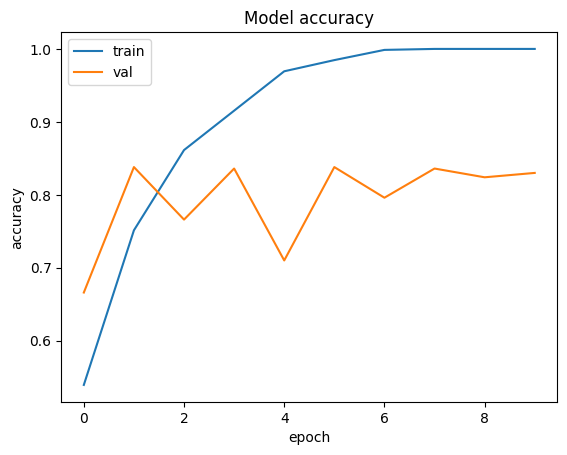

In [ ]:
plot_curves(history_2, "accuracy", "val_accuracy")

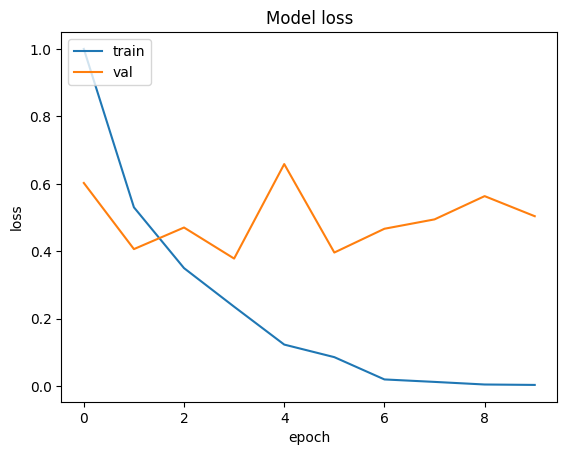

In [ ]:
plot_curves(history_2, "loss", "val_loss")

## 5. Evaluating the model.

<Axes: >

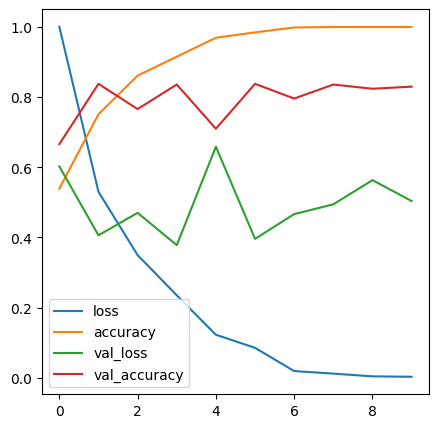

In [ ]:
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize = (5, 5))

In [ ]:
# Plotting validation and training curves seperatly.
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss.
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

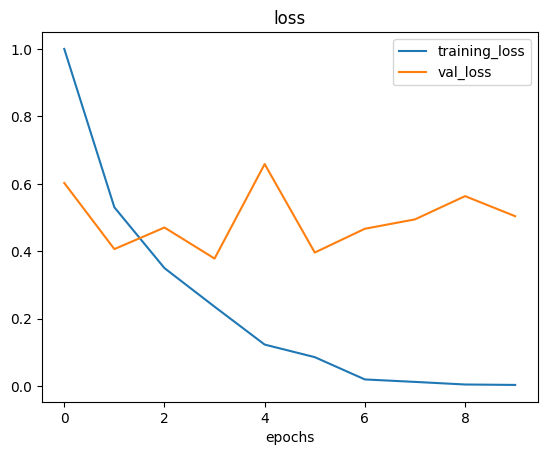

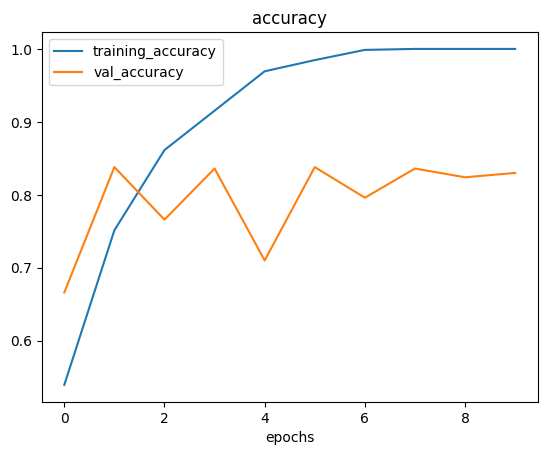

In [ ]:
# Checkout the loss and accuracy of model_2.
plot_loss_curve(history_2)


### Clearly, our model is overfitting, therefore we take certain majors to overcome this effect.

How we do that?

1. Create a baseline model.
2. Overfitting the baseline model with larger model.
3. Reducing the overfitting.

How to induce overfitting?

1. Increase the number of Conv layers.
2. Increase the number of Conv filters.
3. Add another Dense layer to the output of flatten layer.

How to reduce overfitting?

1. Add data agumentation.
2. Add regularization layers (MaxPool2D)
3. Add more data.

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 143ms/step - loss: 0.5804 - accuracy: 0.7027 - val_loss: 0.4779 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5036 - accuracy: 0.7647 - val_loss: 0.4342 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4329 - accuracy: 0.8133 - val_loss: 0.3974 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4099 - accuracy: 0.8207 - val_loss: 0.3651 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3812 - accuracy: 0.8333 - val_loss: 0.3703 - val_accuracy: 0.8340


In [ ]:
print("Model 2")
model_2.summary()

Model 2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Model 3")
model_3.summary()

Model 3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10

### Observe the reduction in the shape after adding maxpool layer. In total it took down the count of total parameters from 477k to just 8k.

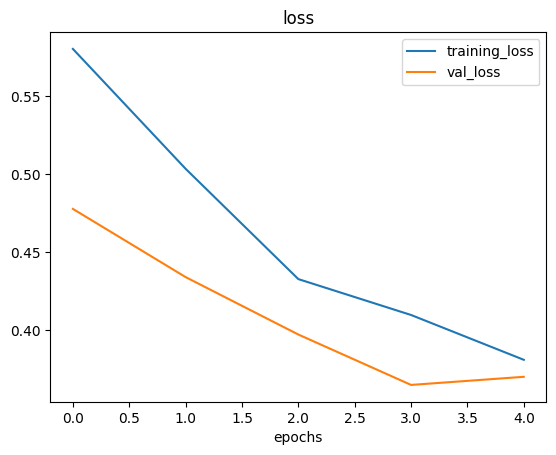

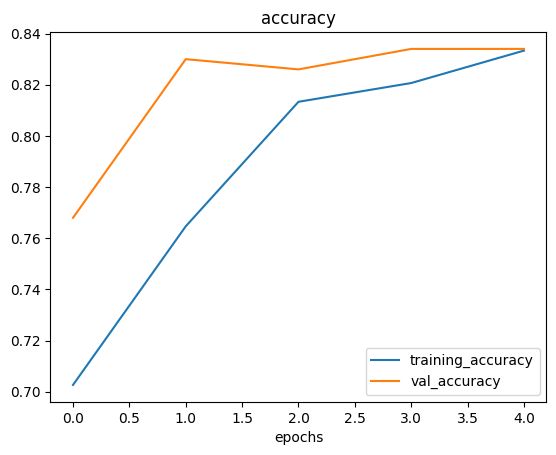

In [ ]:
plot_loss_curve(history_3)

### Still there a chance of slight overfitting, therefore, we go ahead with Data Augmentation.

## **Data Augmentation**
Data augmentation is altering our training data, making it more diversive and allowing our model to learn more generalized patterns. Altering means adjusting certain things like rotating a image, flipping it, croping it etc.


In [ ]:
# Create ImageDataGenerator training with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without augmentation for train.
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Create ImageDataGenerator without augmentation for test.
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
from tensorflow._api.v2.random import shuffle
# Import data and augment it from training directory.
print("Augmented Train Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Non-augmented train data batches.
print("Non-Augmented Train Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Non-augmented test data batches.
print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 500 images belonging to 2 classes.


Note: Data Augmentation is usually for training data. This is done by using ImageDataGenerator, here the images are kept as it is in our directories but are modified as they are loaded into the model.

**Now lets visualise the augmented data.**

In [ ]:
images, labels = train_data.next()
augmentated_images, augmentated_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

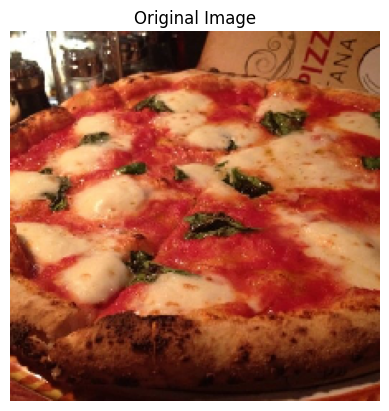

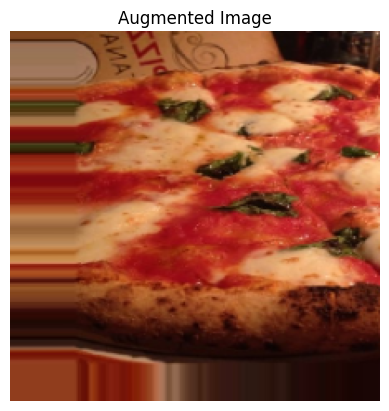

In [ ]:
# Show the original image and augmented image.
import random

random_num = random.randint(0, 31) # Because batch size is 32.
plt.imshow(images[random_num])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmentated_images[random_num])
plt.title("Augmented Image")
plt.axis(False)

### Now let's build a model using this augmented data.

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 501ms/step - loss: 0.7291 - accuracy: 0.4653 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6846 - val_accuracy: 0.5560
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6874 - accuracy: 0.5100 - val_loss: 0.6771 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6885 - accuracy: 0.5273 - val_loss: 0.6839 - val_accuracy: 0.5520
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6815 - accuracy: 0.6540 - val_loss: 0.6709 - val_accuracy: 0.5000


### Let's try to shuffle the data this time, therefore, creating the new training augmented data.

In [ ]:
from tensorflow._api.v2.random import shuffle
# Import data and augment it from training directory.
print("Augmented Train Data")
train_data_augmented_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

# Non-augmented train data batches.
print("Non-Augmented Train Data")
train_data_shuf = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

# Non-augmented test data batches.
print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)


Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 500 images belonging to 2 classes.


### Now we build another model and fit it with shuffled augmented data.

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data_augmented_shuf,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_shuf),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 517ms/step - loss: 0.6832 - accuracy: 0.5347 - val_loss: 0.6110 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5903 - accuracy: 0.6880 - val_loss: 0.4577 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5537 - accuracy: 0.7307 - val_loss: 0.4771 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 25s 532ms/step - loss: 0.5613 - accuracy: 0.7340 - val_loss: 0.4426 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5449 - accuracy: 0.7340 - val_loss: 0.4019 - val_accuracy: 0.8400


### As you can see shuffling of data did improve our model's accuracy on training and validation both.

# **Making predictions.**

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/steak01.jpeg
!wget https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/pizza01.jpeg
steak = mpimg.imread("steak01.jpeg")
pizza = mpimg.imread("pizza01.jpeg")

--2023-10-30 06:33:33--  https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/steak01.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404420 (395K) [image/jpeg]
Saving to: ‘steak01.jpeg’

steak01.jpeg        100%[===================>] 394.94K  --.-KB/s    in 0.02s   

2023-10-30 06:33:34 (24.2 MB/s) - ‘steak01.jpeg’ saved [404420/404420]

--2023-10-30 06:33:34--  https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/pizza01.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response..

(-0.5, 2499.5, 1667.5, -0.5)

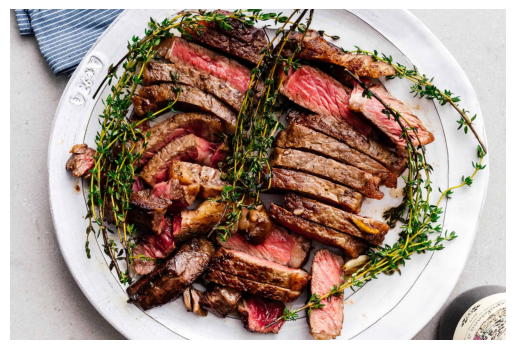

In [ ]:
plt.imshow(steak)
plt.axis(False)

(-0.5, 1499.5, 999.5, -0.5)

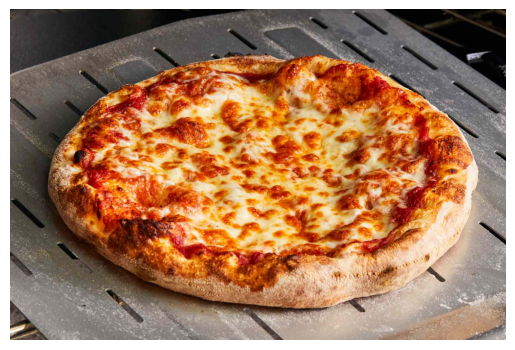

In [ ]:
plt.imshow(pizza)
plt.axis(False)

Let us also check the shapes of both the loaded images.

In [ ]:
# Checking shape.
steak_shape = steak.shape
pizza_shape = pizza.shape

print(f"Steak Image Shape: {steak_shape}")
print(f"Pizza Image Shape: {pizza_shape}")

Steak Image Shape: (1668, 2500, 3)
Pizza Image Shape: (1000, 1500, 3)


As you can both the images are of different shape and also notice that while training our network we used the input shape as 224x224.

**Note:** Always remember we need to use same kind of preprocessing on the custome image as the model was trained on.

In [ ]:
expanded_steak = tf.expand_dims(steak, axis = 0)
expanded_steak

In [ ]:
# Creating a function to load and process the image.
def load_prep_image(filename, image_shape = 224):
  img = tf.io.read_file(filename) # Read file.
  img = tf.image.decode_image(img) # Descode the image.
  img = tf.image.resize(img, size = [image_shape, image_shape]) # Resizing the image.
  img = img/225.
  return img

In [ ]:
# Load and preprocess the steak image.
steak = load_prep_image("steak01.jpeg")
steak

In [ ]:
# Load and preprocess the pizaa image.
pizza = load_prep_image("pizza01.jpeg")

In [ ]:
# Making predictions with model_5 for steak.
pred_steak = model_5.predict(tf.expand_dims(steak, axis = 0))
pred_steak

1/1 [==============================] - 0s 38ms/step


array([[0.95414984]], dtype=float32)

In [ ]:
# Making predictions with model_5 for pizza.
pred_pizza = model_5.predict(tf.expand_dims(pizza, axis = 0))
pred_pizza

1/1 [==============================] - 0s 24ms/step


array([[0.0536362]], dtype=float32)

In [69]:
# Indexing the prediction class by rounding the prediction probability.
pred_class = class_names[int(tf.round(pred_steak))]
pred_class

'steak'

In [70]:
# Indexing the prediction class by rounding the prediction probability.
pred_class = class_names[int(tf.round(pred_pizza))]
pred_class

'pizza'

### As you can see our model is preducting perfectly.

In [71]:
# Helper function to make predictions and plotting the image.
def pred_plot(model, filename, class_names = class_names):

  # Import the target image and preprocess it.
  img = load_prep_image(filename)

  # Make a prediction.
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class.
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


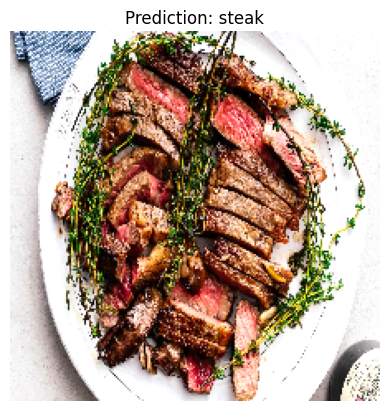

In [73]:
# Let's try to predict a steak using our model_5.
pred_plot(model_5, "steak01.jpeg")

1/1 [==============================] - 0s 43ms/step


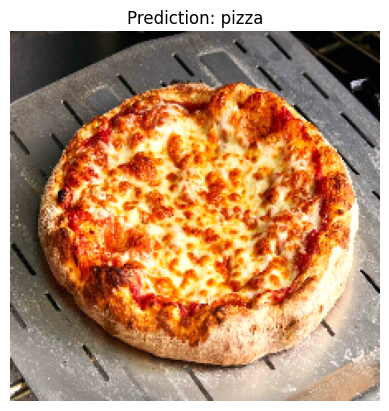

In [74]:
# Let's try to predict a pizza using our model_5.
pred_plot(model_5, "pizza01.jpeg")